<a href="https://colab.research.google.com/github/CarolLuca/Data-Scientist-Program/blob/main/energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

--- LIBRARIES ---

In [ ]:
# libraries
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import datetime
import csv
import io

--- TESTING OF LIBRARIES ---

In [ ]:
# testing datetime library
dt = '21/03/2012'
day, month, year = (int(x) for x in dt.split('/')) 
print(day, month, year)   
ans = datetime.date(year, month, day)
print (ans.strftime("%A"))

21 3 2012
Wednesday


--- IMPORTING ---

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving energyC.csv to energyC.csv


--- READING AND INITIALIZATION ---

In [ ]:
# reading the clean csv
Table = pd.read_csv(io.BytesIO(uploaded['energyC.csv']))
Table

dateRep  Outflow.HHP1  ...  Production.HPP1  Production.HPP2
0     2006/01/01    158.871553  ...      2870.000000      4350.000000
1     2006/01/02    168.014161  ...      1960.000000      4000.000000
2     2006/01/03    113.970973  ...      1886.000000      3740.000000
3     2006/01/04    108.877953  ...      1280.000000      3240.000000
4     2006/01/05     73.086605  ...      2400.000000      5020.000000
...          ...           ...  ...              ...              ...
2826  2013/09/27    128.000000  ...      1252.907525      3204.202028
2827  2013/09/28     60.000000  ...      2884.704663      3871.722356
2828  2013/09/29    139.000000  ...      1275.147544      3597.872481
2829  2013/09/30     61.000000  ...         0.000000      2868.171270
2830  2013/10/01      0.000000  ...         0.000000      2710.593419

[2831 rows x 6 columns]

In [ ]:
for index, row in Table.iterrows():
  Table.loc[index,'Production.HPP1']=Table.loc[index,'Production.HPP1']+0.00005
Table.to_csv('energyC.csv', index=False)

In [ ]:
# eliminating other null or nan elements and arrange the csv file, if needed
Table = Table.replace({0:np.nan})
Table = Table.dropna(subset=['Inflow..HPP1','Outflow.HHP1','Inflow.HPP2','Production.HPP1','Production.HPP2'])
Table['Inflow..HPP1'] = pd.to_numeric(Table['Inflow..HPP1'],errors='coerce')
Table['Production.HPP1'] = pd.to_numeric(Table['Production.HPP1'],errors='coerce')
Table.astype({'dateRep':str})

In [ ]:
Table.head(280-6)

dateRep  Outflow.HHP1  Inflow..HPP1  ...  ProdByInflow  InType  arima_model
1    2006/01/06    135.690533    248.000000  ...     10.362903   99.03          NaN
2    2006/01/07    145.517065    230.000000  ...     10.652174   92.03          NaN
3    2006/01/08    138.368740    186.000000  ...     12.311828   74.03          NaN
4    2006/01/09    128.591676    238.000000  ...      9.621849   95.03          NaN
5    2006/01/10    128.064112    227.000000  ...      9.471366   90.03          NaN
..          ...           ...           ...  ...           ...     ...          ...
270  2006/10/02      0.000000    165.345269  ...      8.164733   66.21 -1718.886763
271  2006/10/03     66.585838    154.839239  ...     24.670749   61.21 -1887.501408
272  2006/10/04    188.513761    427.161182  ...      9.270505  170.21   495.875122
273  2006/10/05    196.367651    296.517232  ...     11.668799  118.21  3821.623809
274  2006/10/06    170.421026    403.665260  ...      9.166011  161.21  2070.723068

[274 rows x 14 columns]

In [ ]:
Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2831 entries, 0 to 2830
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dateRep          2831 non-null   object 
 1   Outflow.HHP1     2831 non-null   float64
 2   Inflow..HPP1     2831 non-null   float64
 3   Inflow.HPP2      2831 non-null   float64
 4   Production.HPP1  2831 non-null   float64
 5   Production.HPP2  2831 non-null   float64
dtypes: float64(5), object(1)
memory usage: 132.8+ KB


# INITIAL GRAPHICS

--- INITIAL VISUAL REPRESENTATIONS ---

In [ ]:
# production by inflow
fig = px.scatter(Table, x = 'Production.HPP1', y = 'Inflow..HPP1', title='HPP1: Inflow - Production')
fig.show()

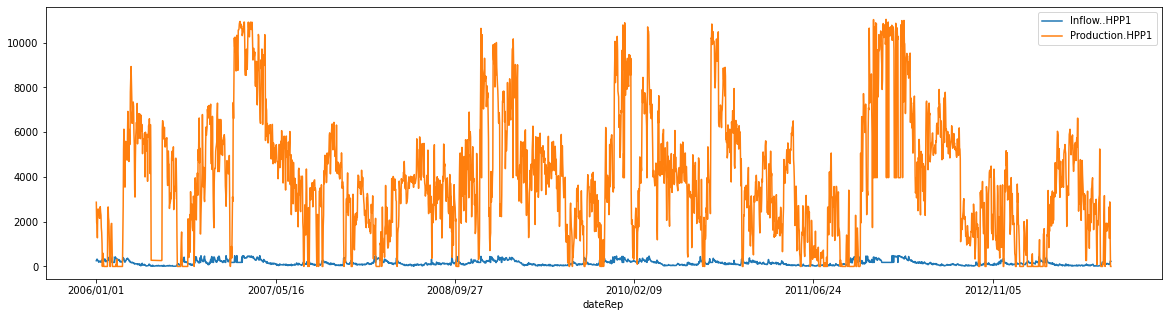

In [ ]:
# inflow and production by date
plt.rcParams["figure.figsize"] = (20,5)
Table.plot(y=['Inflow..HPP1','Production.HPP1'],x='dateRep')
plt.show()

# UPDATE TABLE

--- DIVIDE INTO TYPES ---

In [ ]:
# looking forward to analyse values by type
mean_Inflow_perType=[0]*50
appear_perType=[0]*50

for index, row in Table.iterrows():

  # extract date
  dt = row['dateRep']
  year, month, day = (int(x) for x in dt.split('/'))    
  ans = datetime.date(year, month, day)

  # calculate the type
  tip=1
  #if ans.strftime("%A")=='Saturday' or ans.strftime("%A")=='Sunday':
    #tip=tip+24
  if month==12 or month==1 or month==2:
    if day>15:
      tip=tip+1
    if month==1:
      tip=tip+2
    elif month==2:
      tip=tip+4
  elif month==3 or month==4 or month==5:
    tip=tip+6
    if day>15:
      tip=tip+1
    if month==4:
      tip=tip+2
    elif month==5:
      tip=tip+4
  elif month==6 or month==7 or month==8:
    tip=tip+12
    if day>15:
      tip=tip+1
    if month==7:
      tip=tip+2
    elif month==8:
      tip=tip+4
  elif month==9 or month==10 or month==11:
    tip=tip+18
    if day>15:
      tip=tip+1
    if month==10:
      tip=tip+2
    elif month==11:
      tip=tip+4
  
  # adding useful columns
  Table.loc[index,'date']=ans
  Table.loc[index,'TypeD']=tip                                                # just the type
  Table.loc[index,'DayMonth']=day+float(month/100)                            # day of the year
  Table.loc[index,'Month']=month                                              # month of the year
  Table.loc[index,'Year']=year                                                # the actual year
  Table.loc[index,'ProdByInflow']=row['Production.HPP1']/row['Inflow..HPP1']  # divide production by flow
  Table.loc[index,'InType']=int(row['Inflow..HPP1']/2.5)+float(tip/100)       # variable describing the index of the
                                                                              # interval of length 2.5 and the type

  # update the mean (now is only sum) and contor
  mean_Inflow_perType[tip]=mean_Inflow_perType[tip]+row['Production.HPP1']
  appear_perType[tip]=appear_perType[tip]+1

# calculate the mean (by dividing sum by contor)
i=1
while i<25:
  mean_Inflow_perType[i]=float(mean_Inflow_perType[i]/appear_perType[i])
  print(i,mean_Inflow_perType[i])
  i=i+1

# update csv file
Table.to_csv('energyC.csv', index=False)
Table.head()
  
# we realise that there is a dependence of production by outflow
# that we are trying to reduce it to a linear relation on small
# parts of the graphic (can be associated with the tangents at
# specific points on the graph, that actually represent the base
# process of building/drawing)

1 4253.035656209069
2 5345.201378053424
3 4198.790419583064
4 5089.509162421748
5 4273.785347782929
6 3739.6765312163807
7 4707.904916145764
8 4803.951894671869
9 4586.940669549992
10 4469.095672066659
11 4662.136078199993
12 4183.64684899218
13 4028.5733339249987
14 3814.459505466662
15 3632.8007112249957
16 3149.936888960934
17 2668.210307241667
18 2053.4090075625004
19 2164.0821813583343
20 2545.3753611416673
21 3322.496466528297
22 3731.1949304285667
23 4274.058877104759
24 3833.0089651047642


dateRep  Outflow.HHP1  Inflow..HPP1  ...    Year  ProdByInflow  InType
0  2006/01/01    158.871553         257.0  ...  2006.0     11.167315  102.03
1  2006/01/02    168.014161         253.0  ...  2006.0      7.747036  101.03
2  2006/01/03    113.970973         327.0  ...  2006.0      5.767584  130.03
3  2006/01/04    108.877953         309.0  ...  2006.0      4.142395  123.03
4  2006/01/05     73.086605         262.0  ...  2006.0      9.160306  104.03

[5 rows x 13 columns]

In [ ]:
# add mean by type to the table
for index,row in Table.iterrows():
  Table.loc[index,'AvgPerType']=mean_Inflow_perType[int(row['TypeD'])]

# update csv file
Table.to_csv('energyC.csv', index=False)
Table

dateRep  Outflow.HHP1  Inflow..HPP1  ...  ProdByInflow  InType   AvgPerType
0     2006/01/01    158.871553    257.000000  ...  1.116732e+01  102.03  4198.790420
1     2006/01/02    168.014161    253.000000  ...  7.747036e+00  101.03  4198.790420
2     2006/01/03    113.970973    327.000000  ...  5.767584e+00  130.03  4198.790420
3     2006/01/04    108.877953    309.000000  ...  4.142395e+00  123.03  4198.790420
4     2006/01/05     73.086605    262.000000  ...  9.160306e+00  104.03  4198.790420
...          ...           ...           ...  ...           ...     ...          ...
2826  2013/09/27    128.000000    110.241491  ...  1.136512e+01   44.20  2545.375361
2827  2013/09/28     60.000000    109.039968  ...  2.645548e+01   43.20  2545.375361
2828  2013/09/29    139.000000    201.308541  ...  6.334295e+00   80.20  2545.375361
2829  2013/09/30     61.000000    252.474702  ...  1.980396e-07  100.20  2545.375361
2830  2013/10/01      0.000000    225.907187  ...  2.213298e-07   90.21  3322.496467

[2831 rows x 14 columns]

# NEW GRAPHICS

--- SECOND ORIENTATIVE REPRESENTATIONS ---

In [ ]:
# production by intyoe
fig = px.scatter(Table, x = 'InType', y = 'Production.HPP1', title = 'Try')
fig.show()

In [ ]:
# correlation matrix
corrMatrix=Table.corr()
corrMatrix

Outflow.HHP1  Inflow..HPP1  ...    InType  AvgPerType
Outflow.HHP1         1.000000      0.355496  ...  0.355381    0.344423
Inflow..HPP1         0.355496      1.000000  ...  0.999976    0.483129
Inflow.HPP2          0.252444      0.777242  ...  0.777150    0.428416
Production.HPP1      0.844445      0.374931  ...  0.375002    0.379514
Production.HPP2      0.695466      0.517221  ...  0.517271    0.382261
TypeD               -0.230489     -0.359994  ... -0.358723   -0.638071
DayMonth            -0.001992      0.020325  ...  0.020487   -0.011005
Month               -0.121862     -0.173360  ... -0.172730   -0.416274
Year                -0.075443     -0.135902  ... -0.135892   -0.032147
ProdByInflow         0.183317     -0.473981  ... -0.473857   -0.198271
InType               0.355381      0.999976  ...  1.000000    0.482394
AvgPerType           0.344423      0.483129  ...  0.482394    1.000000

[12 rows x 12 columns]

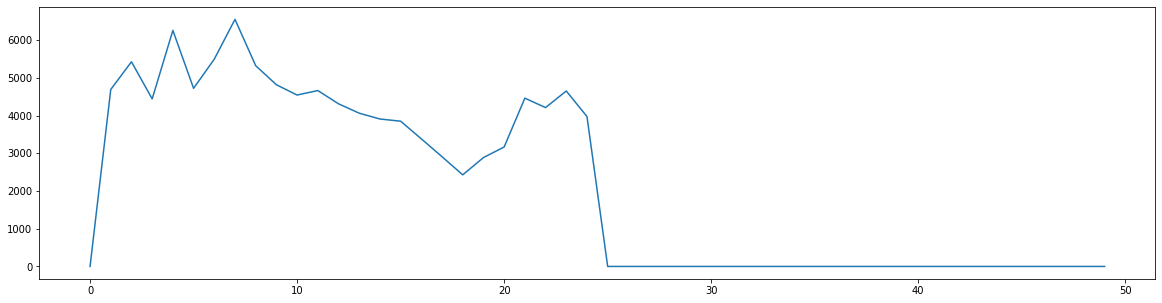

In [ ]:
# show the mean for every type
plt.plot(mean_Inflow_perType)

# LINEAR REGRESSION

--- BEGINNING A LINEAR REGRESSION MODEL ---

In [ ]:
# reimporting some libraries for personal visual purpose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

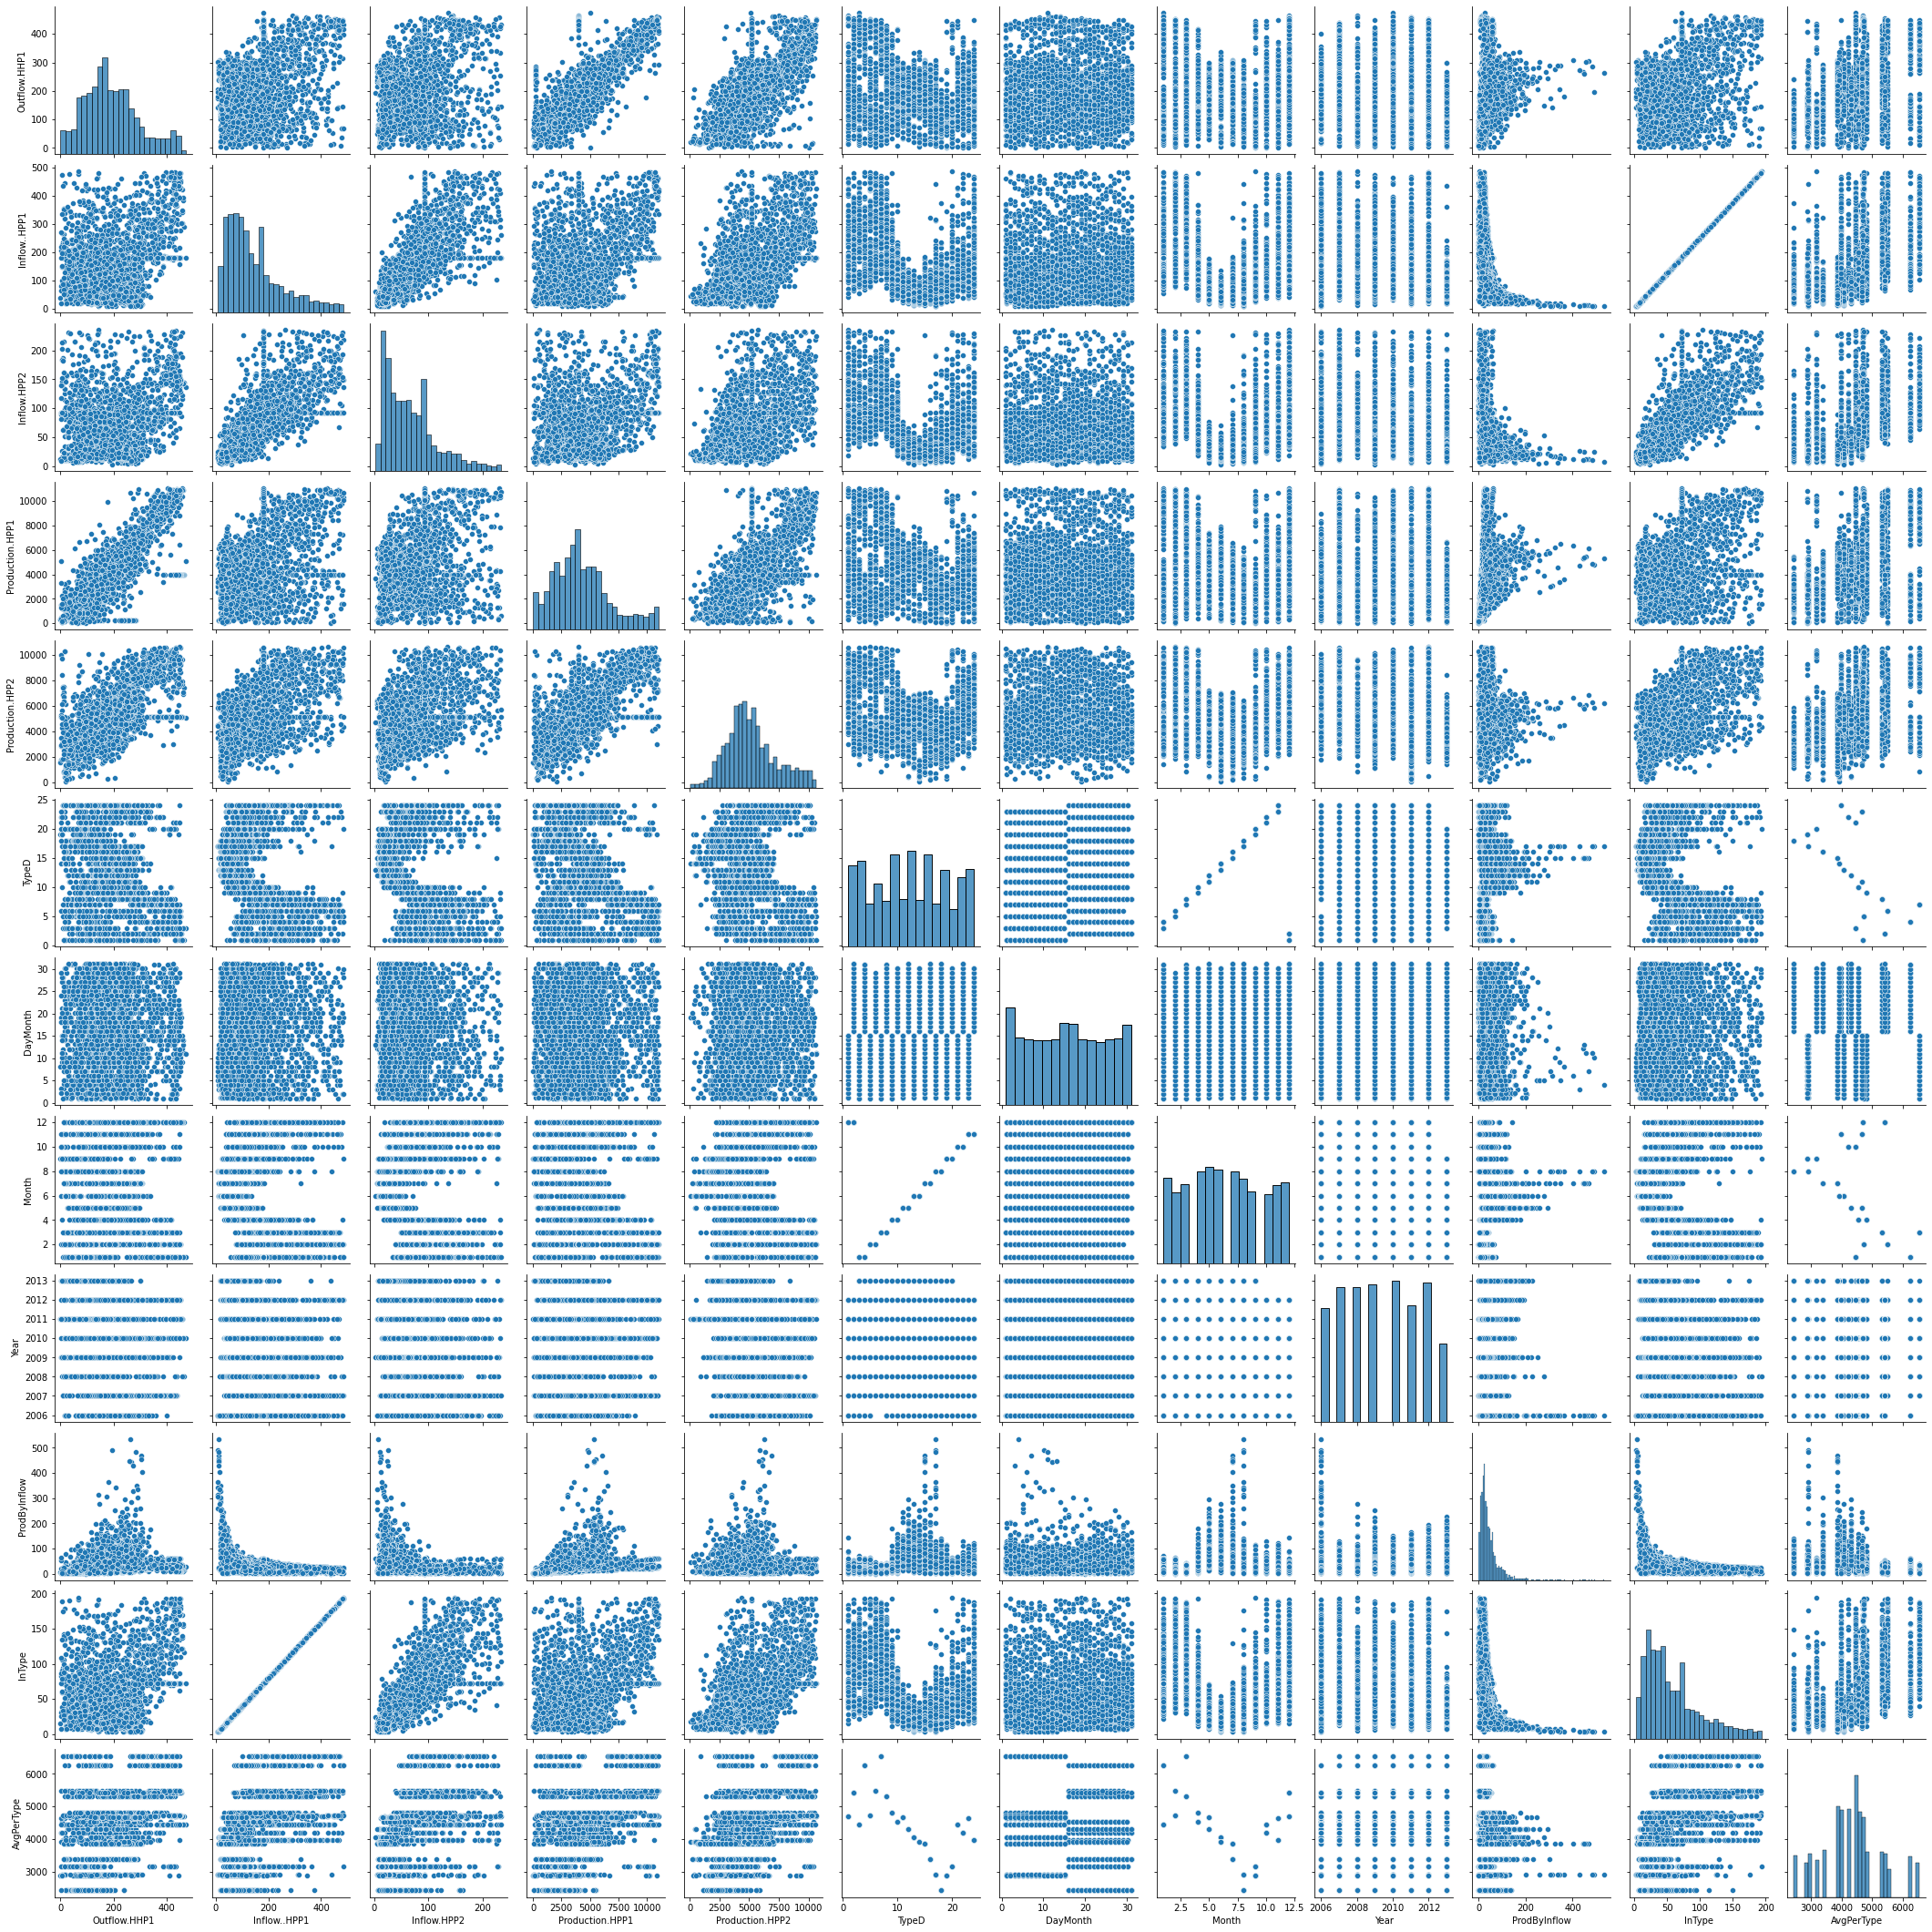

In [ ]:
# everything related to everything
sns.pairplot(Table)

In [ ]:
# columns we use
# Index(['Inflow..HPP1','TypeD','InType','DayMonth','Month','Year','Production.HPP1','Outflow.HHP1'], dtype='object')

In [ ]:
# columns that help us to make predictions
x = Table[['Outflow.HHP1']]

In [ ]:
# columns we are trying to predict
y = Table['Production.HPP1']

In [ ]:
# splitting data into groups of 10% from the overall possesed data for test prediction
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05)

--- VISUAL REPRESENTATIONS ---

In [ ]:
# linear regression
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

[20.66993863]
341.2419686555122


Coeff
Outflow.HHP1  20.669939

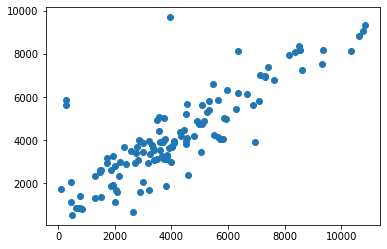

In [ ]:
# basic prediction
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

(array([ 3.,  0.,  0.,  0.,  7., 27., 50., 22., 14.,  3.]),
 array([-5723.41715849, -4847.04258638, -3970.66801427, -3094.29344215,
        -2217.91887004, -1341.54429793,  -465.16972581,   411.2048463 ,
         1287.57941841,  2163.95399053,  3040.32856264]),
 <a list of 10 Patch objects>)

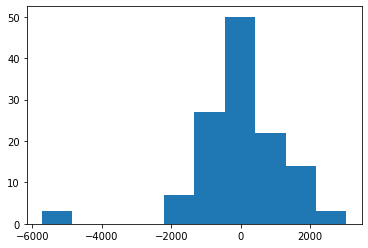

In [ ]:
# basic prediction
plt.hist(y_test - predictions)

--- ERRORS ---

In [ ]:
# MAE
metrics.mean_absolute_error(y_test, predictions)

859.2181787581405

In [ ]:
# MSE
metrics.mean_squared_error(y_test, predictions)

1632209.5913340384

In [ ]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1277.5795831704725

--- SHORT PREDICTION ---

In [ ]:
#dateRep 	    Outflow.HHP1 	Inflow..HPP1 	Inflow.HPP2 	Production.HPP1 	Production.HPP2 	TypeD 	DayMonth 	ProdByInflow 	InType 	Month 	Year  AvgPerType
#2006/01/01 	158.871553 	  257.000000 	  55.000000 	  2870.000000 	    4350.000000 	    27.0 	  1.01 	    11.167315 	  102.27 	1 	    2006 	3990.098158
model.predict([[158.871553]])

array([3625.10721884])

(70.82427688857611, 13788.27944655677, 457.20357653445876, 14174.658746202653)

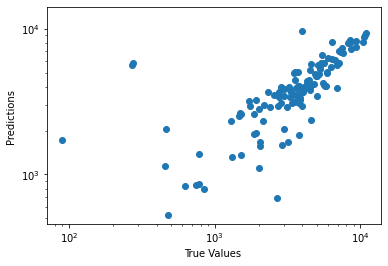

In [ ]:
g=plt.scatter(y_test, predictions)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

# SEASONALITY

--- NEW MODEL SEASONALITY ---

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

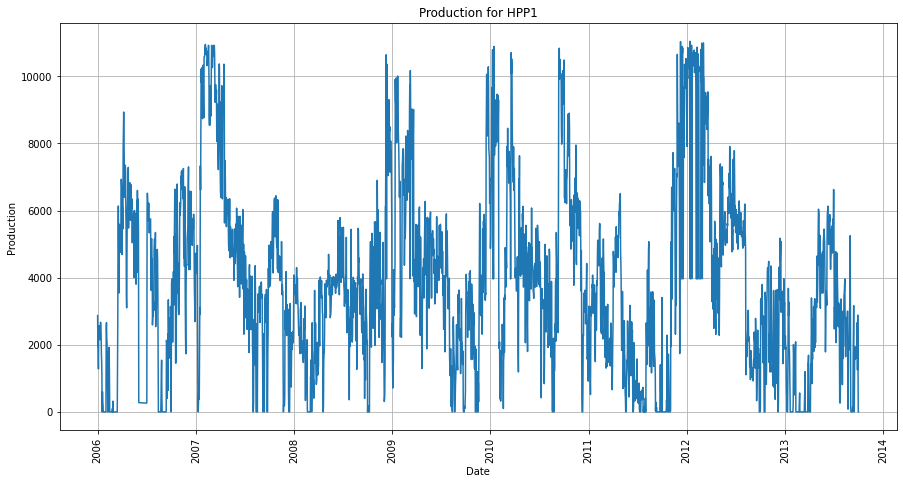

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(Table['date'], Table['Production.HPP1'])
plt.title('Production for HPP1')
plt.ylabel('Production')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

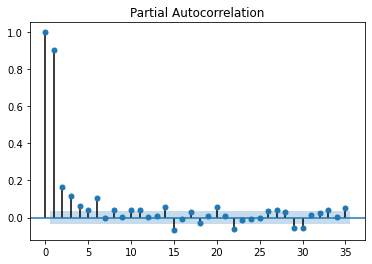

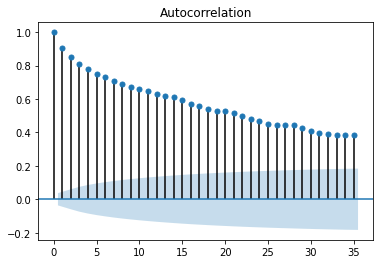

In [ ]:
plot_pacf(Table['Production.HPP1']);
plot_acf(Table['Production.HPP1']);

In [ ]:
# Augmented Dickey-Fuller test

ad_fuller_result = adfuller(Table['Production.HPP1'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.97066378663257
p-value: 2.535943740220535e-05


In [ ]:
# Take the log difference to make data stationary

Table['Production.HPP1'] = np.log(Table['Production.HPP1'])
Table['Production.HPP1'] = Table['Production.HPP1'].diff()
Table = Table.drop(Table.index[0])

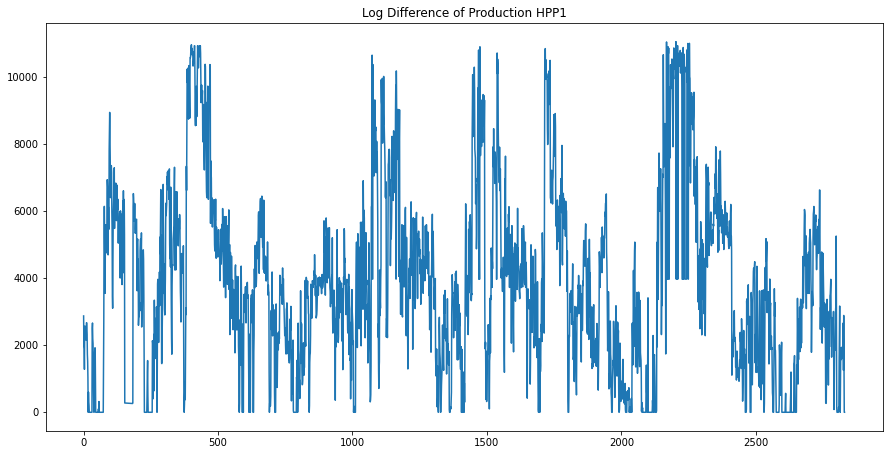

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(Table['Production.HPP1'])
plt.title("Log Difference of Production HPP1")
plt.show()

In [ ]:
# Seasonal differencing

Table['Production.HPP1'] = Table['Production.HPP1'].diff(4)
Table = Table.drop([1, 2, 3, 4], axis=0).reset_index(drop=True)
Table.head()

dateRep  Outflow.HHP1  Inflow..HPP1  ...    Year  ProdByInflow  InType
0  2006/01/01    158.871553         257.0  ...  2006.0     11.167315  102.03
1  2006/01/06    135.690533         248.0  ...  2006.0     10.362903   99.03
2  2006/01/07    145.517065         230.0  ...  2006.0     10.652174   92.03
3  2006/01/08    138.368740         186.0  ...  2006.0     12.311828   74.03
4  2006/01/09    128.591676         238.0  ...  2006.0      9.621849   95.03

[5 rows x 13 columns]

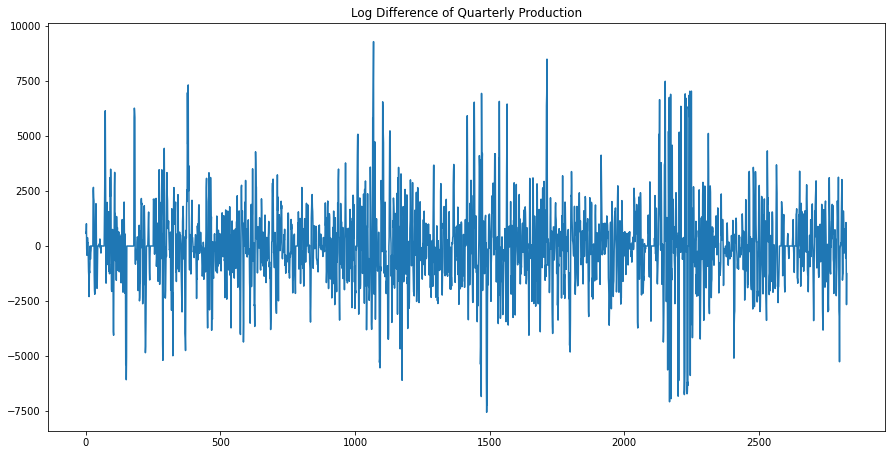

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(Table['Production.HPP1'])
plt.title("Log Difference of Quarterly Production")
plt.show()

In [ ]:
Table = Table.drop(Table.index[0])

In [ ]:
# Augmented Dickey-Fuller test

ad_fuller_result = adfuller(Table['Production.HPP1'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -11.561646525688644
p-value: 3.2593309143802497e-21


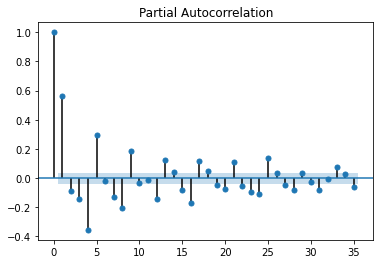

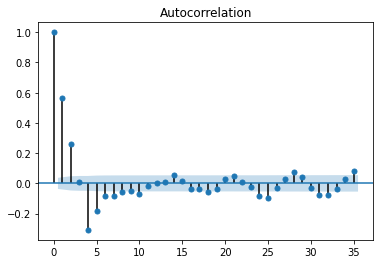

In [ ]:
plot_pacf(Table['Production.HPP1']);
plot_acf(Table['Production.HPP1']);

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [ ]:
#result_df = optimize_SARIMA(parameters_list, 1, 1, 4, Table['Production.HPP1'])
#result_df

In [ ]:
best_model = SARIMAX(Table['Production.HPP1'], order=(1, 0, 3), seasonal_order=(0, 1, 2, 4)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                   Production.HPP1   No. Observations:                 2826
Model:             SARIMAX(1, 0, 3)x(0, 1, 2, 4)   Log Likelihood              -25024.494
Date:                           Sat, 27 Feb 2021   AIC                          50062.987
Time:                                   12:25:05   BIC                          50104.604
Sample:                                        0   HQIC                         50078.003
                                          - 2826                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2112      0.051     -4.136      0.000      -0.311      -0.111
ma.L1          0.9929      0.027     36.459

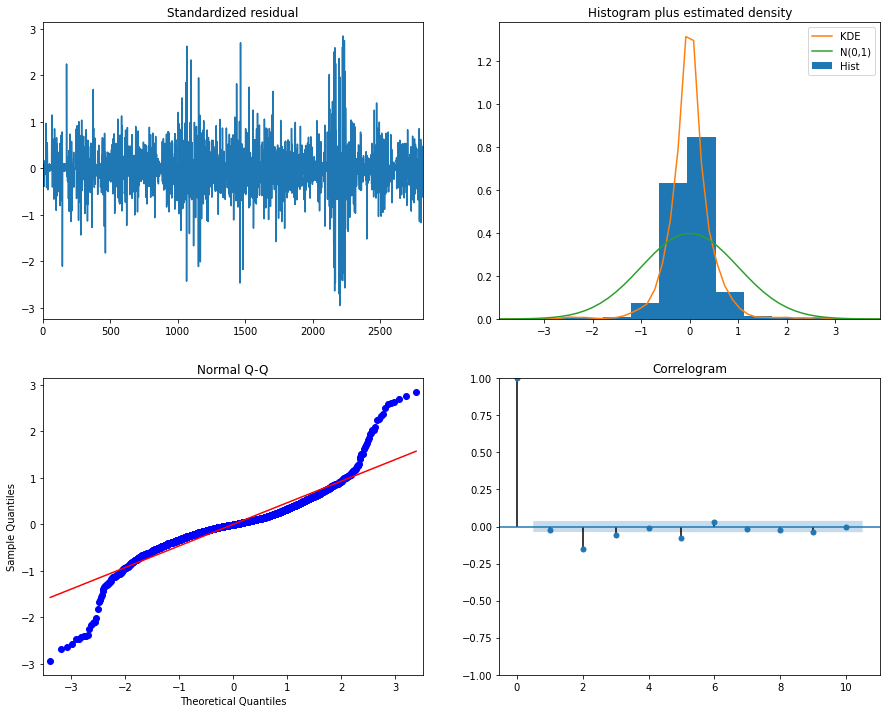

In [ ]:
best_model.plot_diagnostics(figsize=(15,12));

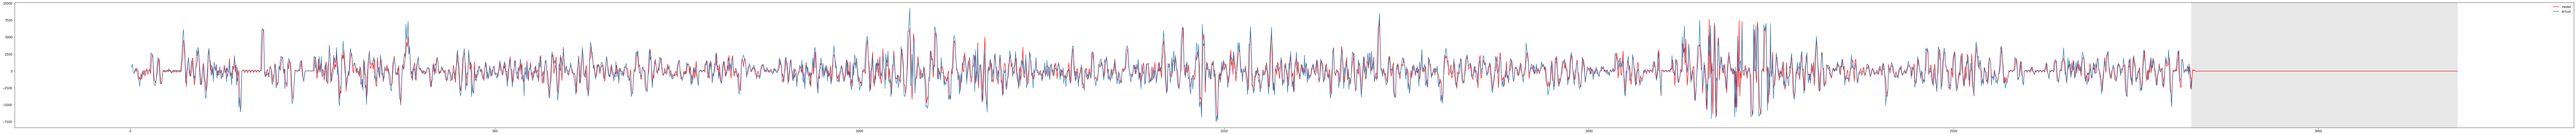

In [ ]:
Table['arima_model'] = best_model.fittedvalues
Table['arima_model'][:4+1] = np.NaN
forecast = best_model.predict(start=Table.shape[0], end=Table.shape[0] + 365)
forecast = Table['arima_model'].append(forecast)
plt.figure(figsize=(150, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(Table.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(Table['Production.HPP1'], label='actual')
plt.legend()
plt.show()

In [ ]:
import math
forecast
i=5
# while i<=2825:
  # print(i,math.exp(np.log(2870)+forecast[i]))
  # i=i+1


In [ ]:
Table

dateRep  Outflow.HHP1  Inflow..HPP1  ...  InType   AvgPerType  arima_model
0     2006/01/06    135.690533    248.000000  ...   99.03  4198.790420          NaN
1     2006/01/07    145.517065    230.000000  ...   92.03  4198.790420          NaN
2     2006/01/08    138.368740    186.000000  ...   74.03  4198.790420          NaN
3     2006/01/09    128.591676    238.000000  ...   95.03  4198.790420          NaN
4     2006/01/10    128.064112    227.000000  ...   90.03  4198.790420          NaN
...          ...           ...           ...  ...     ...          ...          ...
2821  2013/09/27    128.000000    110.241491  ...   44.20  2545.375361    -1.051259
2822  2013/09/28     60.000000    109.039968  ...   43.20  2545.375361     0.351768
2823  2013/09/29    139.000000    201.308541  ...   80.20  2545.375361    -0.431674
2824  2013/09/30     61.000000    252.474702  ...  100.20  2545.375361    -0.449034
2825  2013/10/01      0.000000    225.907187  ...   90.21  3322.496467     4.561768

[2826 rows x 15 columns]

In [ ]:
forecast

1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
          ...    
3187   -31.358022
3188   -30.836420
3189   -32.818852
3190   -31.101417
3191   -31.358022
Length: 3192, dtype: float64

In [ ]:
# 1st value: 2870
# lim suppe: 2825
# pred=pred+math.exp(np.log(2870)+forecast[i])
# from nrdays1+1 to nrdays2+2 after the last date given in csv
i=2826
nr_days1=1
nr_days2=3
k=0
pred=0
while k<nr_days2:
  if k>nr_days1:
    # pred=pred+math.exp(np.log(2870)+forecast[i])
    pred=pred+forecast[i]+2870
  i=i+1
  k=k+1
  if i>3191:
    i=5
pred

3060.6237782467015

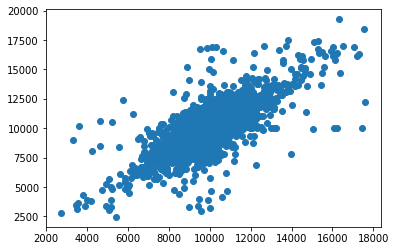

In [ ]:
plt.scatter(forecast[:2825]+10000,Table['Production.HPP1'][:2825]+10000)